# Chapter 1: Transformers and Pipelines

# Transformers, what can they do?

Course Website: https://huggingface.co/learn/nlp-course/chapter1/3


Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [ ]:
%%capture
!pip install datasets evaluate transformers[sentencepiece]

Also, log into Hugging face

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

### Transformers are everywhere!

<font color='blue'>Transformer models</font> are used to solve <font color='blue'>all kinds of NLP tasks</font>, like the ones mentioned in the previous section. Here are some of the companies and organizations using Hugging Face and Transformer models, who also contribute back to the community by sharing their models:

![](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/companies.PNG)

The [🤗 Transformers library](https://github.com/huggingface/transformers) provides the functionality to <font color='blue'>create</font> and <font color='blue'>use</font> those <font color='blue'>shared models</font>. The [Model Hub](https://huggingface.co/models) contains <font color='blue'>thousands</font> of <font color='blue'>pretrained models</font> that anyone can <font color='blue'>download</font> and <font color='blue'>use</font>. You can also upload your own models to the Hub!

Before diving into how Transformer models work under the hood, let's look at a few examples of how they can be used to solve some interesting NLP problems.

## Transformers architecture

The model is primarily composed of two blocks:

* **Encoder (left)**: The encoder receives an input and builds a representation of it (its features). This means that the model is optimized to acquire understanding from the input.
* **Decoder (right)**: The decoder uses the encoder's representation (features) along with other inputs to generate a target sequence. This means that the model is optimized for generating outputs.

<div class="flex justify-center">
<img class="block dark:hidden" src="https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/transformers_blocks.svg" alt="Architecture of a Transformers models">

Each of these parts can be used independently, depending on the task:

* **Encoder-only models**: Good for tasks that require understanding of the input, such as sentence classification and named entity recognition.
* **Decoder-only models**: Good for generative tasks such as text generation.
* **Encoder-decoder models** or **sequence-to-sequence models**: Good for generative tasks that require an input, such as translation or summarization.


###  Working with pipelines

The most basic object in the 🤗 Transformers library is the <font color='blue'>pipeline() function</font>. It <font color='blue'>connects</font> a <font color='blue'>model</font> with its necessary <font color='blue'>preprocessing</font> and <font color='blue'>postprocessing steps</font>, allowing us to directly input any text and get an intelligible answer:

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
classifier("I've been waiting for a HuggingFace course my whole life.")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

We can even pass <font color='blue'>several sentences</font>!

In [ ]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.",
     "I hate this so much!",
     "I like to eat chocolate and peanut butter.",
     "Do you like green eggs and ham?",
     "What is better than running?",
     "I don't like walking without socks."]
)

[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455},
 {'label': 'POSITIVE', 'score': 0.9995144605636597},
 {'label': 'POSITIVE', 'score': 0.8833526968955994},
 {'label': 'NEGATIVE', 'score': 0.9764426350593567},
 {'label': 'POSITIVE', 'score': 0.8040932416915894}]

By default, this pipeline <font color='blue'>selects</font> a <font color='blue'>particular pretrained model</font> that has been <font color='blue'>fine-tuned</font> for <font color='blue'>sentiment analysis</font> in English. The model is <font color='blue'>downloaded</font> and <font color='blue'>cached</font> when you create the <font color='blue'>classifier</font> object. If you <font color='blue'>rerun</font> the <font color='blue'>command</font>, the <font color='blue'>cached model</font> will be <font color='blue'>used</font> instead and there is no need to download the model again.

There are <font color='blue'>three main steps</font> involved when you pass some text to a pipeline:

1. The text is <font color='blue'>preprocessed</font> into a format the model can understand.
2. The <font color='blue'>preprocessed inputs</font> are <font color='blue'>passed</font> to the <font color='blue'>model</font>.
3. The <font color='blue'>predictions</font> of the model are <font color='blue'>post-processed</font>, so you can make sense of them.

Some of the currently [available pipelines](https://huggingface.co/transformers/main_classes/pipelines) are:

1. feature-extraction (get the vector representation of a text)
2. fill-mask
3. ner (named entity recognition)
4. question-answering
5. sentiment-analysis
6. summarization
7. text-generation
8. translation
9. zero-shot-classification

Let's have a look at a few of these!

### Zero-shot classification

We'll start by tackling a <font color='blue'>more challenging</font> task where we need to <font color='blue'>classify texts</font> that <font color='blue'>haven't been labelled</font>. This is a common scenario in real-world projects because annotating text is usually time-consuming and requires domain expertise. For this use case, the <font color='blue'>zero-shot-classification</font> pipeline is very powerful: it allows you to specify <font color='blue'>which labels to use for the classification</font>, so you <font color='blue'>don't have to rely on the labels of the pretrained model</font>. You've already seen how the model can classify a sentence as positive or negative using those two labels — but it can also classify the text using any other set of labels you like.

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445968627929688, 0.1119757816195488, 0.04342734441161156]}

In [ ]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
classifier(
    "My favoite sport involves running shoes and long distances.",
    candidate_labels=["health", "education", "politics"],
)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'sequence': 'My favoite sport involves running shoes and long distances.',
 'labels': ['health', 'education', 'politics'],
 'scores': [0.7021063566207886, 0.18310600519180298, 0.11478759348392487]}

This <font color='blue'>pipeline</font> is called <font color='blue'>zero-shot</font> because you <font color='blue'>don't need</font> to <font color='blue'>fine-tune the model</font> on your data to use it. It can directly return probability scores for any list of labels you want!

### Text generation

Now let's see how to <font color='blue'>use</font> a <font color='blue'>pipeline</font> to <font color='blue'>generate some text</font>. The main idea here is that you <font color='blue'>provide a prompt</font> and the <font color='blue'>model will auto-complete</font> it by <font color='blue'>generating</font> the remaining <font color='blue'>text</font>. This is similar to the predictive text feature that is found on many phones. Text generation involves randomness, so it's normal if you don't get the same results as shown below.

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="openai-community/gpt2")
generator("In this course, we will teach you how to",
          max_length=20, # Length of sentence
          num_return_sequences=4) # 4 sentences

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "In this course, we will teach you how to implement the Racket program into the Raspberry Pi's"},
 {'generated_text': 'In this course, we will teach you how to create a virtual machine like Linux, which uses the'},
 {'generated_text': 'In this course, we will teach you how to read and write a complex code, which I shall'},
 {'generated_text': 'In this course, we will teach you how to use both of them in order to get rid of'}]

### Using any model from the Hub in a pipeline

The previous examples used the <font color='blue'>default model</font> for the task at hand, but you can also <font color='blue'>choose</font> a <font color='blue'>particular model</font> from the <font color='blue'>Hub</font> to use in a pipeline for a specific task — say, text generation. Go to the [Model Hub](https://huggingface.co/models) and <font color='blue'>click</font> on the <font color='blue'>corresponding tag</font> on the <font color='blue'>left</font> to display only the supported models for that task. You should get to a page like [this one](https://huggingface.co/models?pipeline_tag=text-generation).

Let's try the [distilgpt2](https://huggingface.co/distilgpt2) model! Here's how to load it in the same pipeline as before:

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to set your course:\n\n\n\n\nCreate and set the new variable to use to manage the'},
 {'generated_text': 'In this course, we will teach you how to develop a unique brand of custom-built machine parts to the user experience, from to the user experience'}]

And similarly for the <font color='blue'>gpt2-large</font> model:

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="gpt2-large")

generator(
    "Boys like to do the following activities in the summer",
    max_length=30,
    num_return_sequences=5,
)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Boys like to do the following activities in the summer holidays;\n\n• to get up, to cook, to play football (with a friend'},
 {'generated_text': 'Boys like to do the following activities in the summer of every year (all activities are done as often but as little, if at all, as'},
 {'generated_text': 'Boys like to do the following activities in the summer:\n\n- Take a break from summer vacation time to go to the beach, where there'},
 {'generated_text': "Boys like to do the following activities in the summer when it's hot:\n\nVisit beach playgrounds\n\nVisit the lake\n\nPlay"},
 {'generated_text': 'Boys like to do the following activities in the summer – for reasons that are totally self-evident. (If the weather is too warm to'}]

You can <font color='blue'>refine</font> your <font color='blue'>search</font> for a model by <font color='blue'>clicking</font> on the <font color='blue'>language tags</font>, and pick a model that will generate text in another language. The <font color='blue'>Model Hub</font> even contains <font color='blue'>checkpoints</font> for <font color='blue'>multilingual models</font> that support several languages.

Once you select a model by clicking on it, you'll see that there is a <font color='blue'>widget</font> enabling you to <font color='blue'>try it directly online</font>. This way you can quickly test the model's capabilities before downloading it.

### Question answering

The <font color='blue'>question-answering</font> pipeline <font color='blue'>answers questions</font> using information from a given context.

Let's firs try this with <font color='blue'>DistilBERT</font>:

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering", model="distilbert/distilbert-base-cased-distilled-squad")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.6949753165245056, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

Then with <font color='blue'>BERT large model (uncased)</font>:

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.5150135159492493,
 'start': 33,
 'end': 57,
 'answer': 'Hugging Face in Brooklyn'}

Note that this pipeline works by <font color='blue'>extracting information</font> from the <font color='blue'>provided context</font>; it does not generate the answer.

# Chapter 2: Using 🤗 Transformers

As we saw in [Chapter 1](https://huggingface.co/course/chapter1), this pipeline groups together three steps: preprocessing, passing the inputs through the model, and postprocessing:

en_chapter2_full_nlp_pipeline.svg

In a general neural network, we typically use the same loss function for any type of multilayer neural networks for binary classification. We use the logistic <font color='blue'>sigmoid function</font> $\sigma(\cdot)$ in the <font color='blue'>output layer</font>, and the <font color='blue'>logits</font> $z$ are the <font color='blue'>weighted inputs at the output layer</font> as illustrated in the figure below.
![logits](https://sebastianraschka.com/images/blog/2022/losses-learned-part1/likelihood-loss-nn-1.png)

At the start of this chapter, we've been trying our best to do <font color='blue'>most</font> of the <font color='blue'>work by hand</font>. We've explored how tokenizers work and looked at tokenization, conversion to input IDs, padding, truncation, and attention masks.

However, as we saw in section 2, the 🤗 <font color='blue'>Transformers API</font> can <font color='blue'>handle all of this</font> for us with a <font color='blue'>high-level function</font> that we'll dive into here. When you <font color='blue'>call</font> your <font color='blue'>tokenizer directly</font> on the <font color='blue'>sentence</font>, you get back <font color='blue'>inputs</font> that are <font color='blue'>ready</font> to pass through your <font color='blue'>model</font>:

In [ ]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)
for input in model_inputs:
  print(f"{input}: {model_inputs[input]}")

input_ids: [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
attention_mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Here, the <font color='blue'>model_inputs</font> variable contains <font color='blue'>everything</font> that's necessary for a model to operate well. For <font color='blue'>DistilBERT</font>, that includes the <font color='blue'>input IDs</font> as well as the <font color='blue'>attention mask</font>. <font color='blue'>Other models</font> that accept additional inputs will also have those <font color='blue'>output</font> by the <font color='blue'>tokenizer object</font>.

As we'll see in some examples below, this method is very powerful. First, it can <font color='blue'>tokenize</font> a <font color='blue'>single sequence</font>:

In [ ]:
sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)
for input in model_inputs:
  print(f"{input}: {model_inputs[input]}")

input_ids: [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
attention_mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


It also handles <font color='blue'>multiple sequences</font> at a time, with <font color='blue'>no change</font> in the API:

In [ ]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

model_inputs = tokenizer(sequences)
for input in model_inputs:
    print(f"{input}:")
    for idx, entry in enumerate(model_inputs[input]):
        print(f"  {input} for sentence {idx+1}: {entry}")

input_ids:
  input_ids for sentence 1: [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
  input_ids for sentence 2: [101, 2061, 2031, 1045, 999, 102]
attention_mask:
  attention_mask for sentence 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  attention_mask for sentence 2: [1, 1, 1, 1, 1, 1]


It can <font color='blue'>pad</font> according to <font color='blue'>several objectives</font>:

In [ ]:
# Pads the sequences up to the maximum sequence length
model_inputs = tokenizer(sequences, padding="longest")
for input in model_inputs:
    print(f"{input}:")
    for idx, entry in enumerate(model_inputs[input]):
        print(f"  {input} for sentence {idx+1}: {entry}")

input_ids:
  input_ids for sentence 1: [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
  input_ids for sentence 2: [101, 2061, 2031, 1045, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
attention_mask:
  attention_mask for sentence 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  attention_mask for sentence 2: [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Pads sequences up to the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, padding="max_length")
for input in model_inputs:
    print(f"{input}:")
    for idx, entry in enumerate(model_inputs[input]):
        print(f"  {input} for sentence {idx+1}: {entry}")

input_ids:
  input_ids for sentence 1: [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# Pads sequences up to the specified max length
model_inputs = tokenizer(sequences, padding="max_length", max_length=8)
for input in model_inputs:
    print(f"{input}:")
    for idx, entry in enumerate(model_inputs[input]):
        print(f"  {input} for sentence {idx+1}: {entry}")

input_ids:
  input_ids for sentence 1: [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
  input_ids for sentence 2: [101, 2061, 2031, 1045, 999, 102, 0, 0]
attention_mask:
  attention_mask for sentence 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  attention_mask for sentence 2: [1, 1, 1, 1, 1, 1, 0, 0]


In [ ]:
# Note: In the above example you need to pass truncation=True for sequences longer than the max_length
model_inputs = tokenizer(sequences, padding="max_length", max_length=8,truncation=True)
for input in model_inputs:
    print(f"{input}:")
    for idx, entry in enumerate(model_inputs[input]):
        print(f"  {input} for sentence {idx+1}: {entry}")

input_ids:
  input_ids for sentence 1: [101, 1045, 1005, 2310, 2042, 3403, 2005, 102]
  input_ids for sentence 2: [101, 2061, 2031, 1045, 999, 102, 0, 0]
attention_mask:
  attention_mask for sentence 1: [1, 1, 1, 1, 1, 1, 1, 1]
  attention_mask for sentence 2: [1, 1, 1, 1, 1, 1, 0, 0]


It can also <font color='blue'>truncate sequences</font>:

In [ ]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Truncates sequences that are longer than the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, truncation=True)
for input in model_inputs:
    print(f"{input}:")
    for idx, entry in enumerate(model_inputs[input]):
        print(f"  {input} for sentence {idx+1}: {entry}")

input_ids:
  input_ids for sentence 1: [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
  input_ids for sentence 2: [101, 2061, 2031, 1045, 999, 102]
attention_mask:
  attention_mask for sentence 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  attention_mask for sentence 2: [1, 1, 1, 1, 1, 1]


In [ ]:
# Truncates sequences that are longer than the specified max length
model_inputs = tokenizer(sequences, max_length=8, truncation=True)
for input in model_inputs:
    print(f"{input}:")
    for idx, entry in enumerate(model_inputs[input]):
        print(f"  {input} for sentence {idx+1}: {entry}")

input_ids:
  input_ids for sentence 1: [101, 1045, 1005, 2310, 2042, 3403, 2005, 102]
  input_ids for sentence 2: [101, 2061, 2031, 1045, 999, 102]
attention_mask:
  attention_mask for sentence 1: [1, 1, 1, 1, 1, 1, 1, 1]
  attention_mask for sentence 2: [1, 1, 1, 1, 1, 1]


The <font color='blue'>tokenizer object</font> can handle the <font color='blue'>conversion</font> to <font color='blue'>specific framework tensors</font>, which can then be directly <font color='blue'>sent</font> to the <font color='blue'>model</font>. For example, in the following code sample we are prompting the tokenizer to return tensors from the different frameworks — <font color='blue'>pt</font> returns <font color='blue'>PyTorch</font> tensors, <font color='blue'>tf</font> returns <font color='blue'>TensorFlow</font> tensors, and <font color='blue'>np</font> returns NumPy arrays:

In [ ]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Return PyTorch tensors
model_inputs = tokenizer(sequences, padding=True, return_tensors="pt")
type(model_inputs['input_ids'])

torch.Tensor

In [ ]:
# Return TensorFlow tensors
model_inputs = tokenizer(sequences, padding=True, return_tensors="tf")
type(model_inputs['input_ids'])

tensorflow.python.framework.ops.EagerTensor

In [ ]:
# Return NumPy arrays
model_inputs = tokenizer(sequences, padding=True, return_tensors="np")
type(model_inputs['input_ids'])

numpy.ndarray

### Special tokens

If we take a look at the <font color='blue'>input IDs</font> returned by the <font color='blue'>tokenizer</font>, we will see they are a <font color='blue'>tiny bit different</font> from what we had earlier:

In [ ]:
sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)
print('Previous implementation: ', model_inputs["input_ids"])

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print('Current implementation: ', ids)

Previous implementation:  [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
Current implementation:  [1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012]


One token ID was <font color='blue'>added</font> at the <font color='blue'>beginning</font>, and <font color='blue'>one</font> at the <font color='blue'>end</font>. Let's decode the two sequences of IDs above to see what this is about:

In [ ]:
print(tokenizer.decode(model_inputs["input_ids"]))
print(tokenizer.decode(ids))

[CLS] i've been waiting for a huggingface course my whole life. [SEP]
i've been waiting for a huggingface course my whole life.


The <font color='blue'>tokenizer</font> added the special word <font color='blue'>[CLS]</font> at the <font color='blue'>beginning</font> and the special word <font color='blue'>[SEP]</font> at the <font color='blue'>end</font>. This is because the <font color='blue'>model</font> was <font color='blue'>pretrained with those</font>, so to get the same results for inference we need to add them as well. Note that <font color='blue'>some models don't add special words</font>, or add different ones; models may also add these special words only at the beginning, or only at the end. In any case, the tokenizer knows which ones are expected and will deal with this for you.

### Wrapping up: From tokenizer to model

 Now that we've seen all the individual steps the `tokenizer` object uses when applied on texts, let's see one final time how it can handle

 - multiple sequences (<font color='blue'>padding</font>)
 - very long sequences (<font color='blue'>truncation</font>)
 - multiple types of tensors


 with its main API:

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
output = model(**tokens)
print(output)

SequenceClassifierOutput(loss=None, logits=tensor([[-1.5607,  1.6123],
        [-3.6183,  3.9137]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [ ]:
logits = output.logits
print(logits)

tensor([[-1.5607,  1.6123],
        [-3.6183,  3.9137]], grad_fn=<AddmmBackward0>)


In [ ]:
import numpy as np

# Convert logits to probabilities
probabilities = torch.nn.functional.softmax(logits, dim=-1)

# Display output probabilities as decimals (instead of the default of scientific notation)
np.set_printoptions(suppress=True, precision=8, floatmode='fixed')

# Print logits and corresponding probabilities
for i, sequence in enumerate(sequences):
    print(f"Sequence: {sequence}")
    print(f"Logits: {logits[i].detach().numpy()}")
    print(f"Probabilities: {probabilities[i].detach().numpy()}")
    print(f"Predicted Class: {torch.argmax(logits[i]).item()}\n")

Sequence: I've been waiting for a HuggingFace course my whole life.
Logits: [-1.56069887  1.61228395]
Probabilities: [0.04019519 0.95980483]
Predicted Class: 1

Sequence: So have I!
Logits: [-3.61831784  3.91374946]
Probabilities: [0.00053534 0.99946469]
Predicted Class: 1



# Chapter 3: Fine-Tuning a Pretrained Model

At the end of this chapter, we completed a full training on the <font color='blue'>GLUE SST-2 dataset</font>.

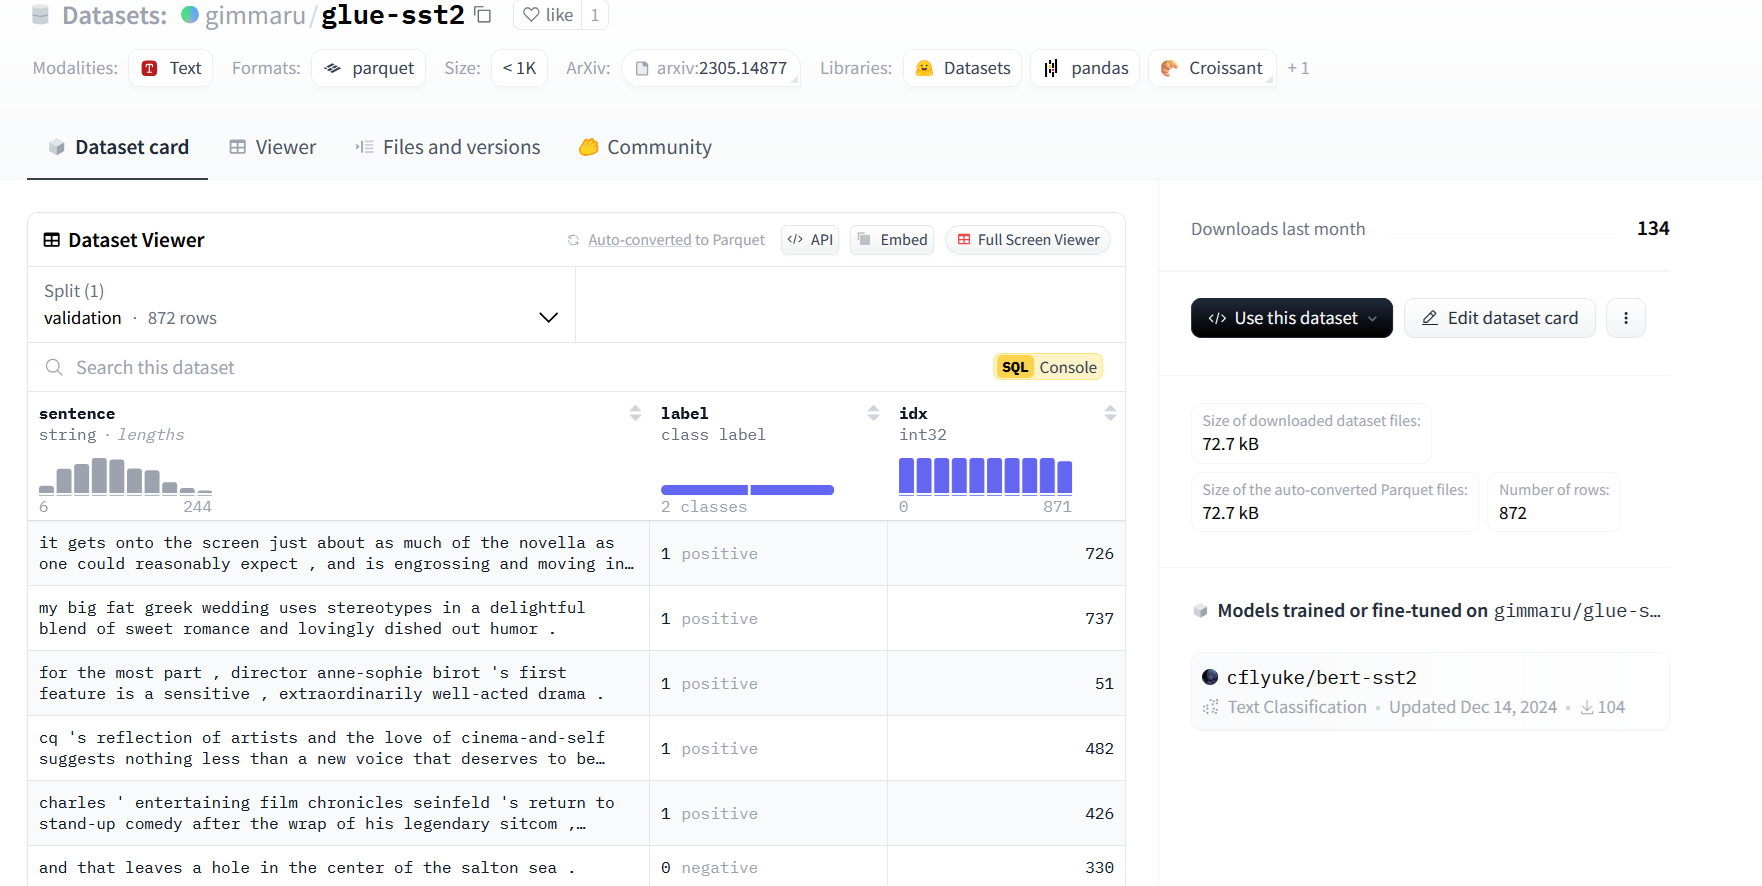

**Loading the GLUE SST-2 dataset using the Hugging Face Transformers library:** We went through the process of preprocessing the GLUE SST-2 dataset using the Hugging Face Transformers library. The <font color='blue'>SST-2 dataset</font> is a <font color='blue'>single-sentence text classification task</font>, making it slightly different from other GLUE tasks that involve pairs of sentences. We'll cover loading the dataset, tokenization, and training.

**1. Loading the Dataset, Tokenization, and Preprocessing:**
We'll start by loading the SST-2 dataset from the 🤗 Datasets library. This dataset consists of <font color='blue'>single sentences</font> along with their <font color='blue'>corresponding labels</font>. After we download the raw dataset, we will <font color='blue'>preprocess the data</font> by tokenizing the sentences using a <font color='blue'>pretrained tokenizer</font>. We'll <font color='blue'>define</font> a <font color='blue'>tokenization function</font> and then apply it to the entire dataset.

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding
from torch.utils.data import DataLoader

raw_datasets = load_dataset("glue", "sst2")
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(example):
    return tokenizer(example["sentence"], truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

tokenized_datasets = tokenized_datasets.remove_columns(["sentence", "idx"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch")
tokenized_datasets["train"].column_names

train_dataloader = DataLoader(
    tokenized_datasets["train"], shuffle=True, batch_size=8, collate_fn=data_collator
)
eval_dataloader = DataLoader(
    tokenized_datasets["validation"], batch_size=8, collate_fn=data_collator
)

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

**2. Modeling:** Next, we'll define the <font color='blue'>model</font> to be <font color='blue'>fine-tuned</font>. We'll use the <font color='blue'>AutoModelForSequenceClassification class</font>.

In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import AdamW, get_scheduler # Optimizer and a Learning Rate Scheduler

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
optimizer = AdamW(model.parameters(), lr=5e-5)

num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**3. Defining the Trainer and Fine-Tuning the Model:**

Now, we can define the <font color='blue'>Trainer</font> using the model, <font color='blue'>training arguments, datasets, data collator, and tokenizer</font>. Additionally, we'll specify the <font color='blue'>fine-tuning process</font> using the <font color='blue'>`train()` method</font>. The method <font color='blue'>`model.train()`</font> tells your model that you are <font color='blue'>training the model</font> and the method <font color='blue'>`mode.eval()`</font> is used for <font color='blue'>evaluation (inference) mode</font>. This helps inform layers such as <font color='blue'>Dropout and BatchNorm</font>, which are designed to <font color='blue'>behave differently</font> during <font color='blue'>training</font> and <font color='blue'>evaluation</font>. For instance, in training mode, BatchNorm updates a moving average on each new batch; whereas, for evaluation mode, these updates are frozen.

In [ ]:
from tqdm.auto import tqdm

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)
model.to(device)
progress_bar = tqdm(range(num_training_steps))

cuda


  0%|          | 0/25257 [00:00<?, ?it/s]

In [ ]:
model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

**Supercharge your training loop with 🤗 Accelerate**

The training loop we defined earlier works fine on a <font color='blue'>single CPU or GPU</font>. But using the [🤗 Accelerate library](https://github.com/huggingface/accelerate), with just a few adjustments we can enable <font color='blue'>distributed training on multiple GPUs or TPUs</font>. Starting from the creation of the training and validation dataloaders, here is what our manual training loop looks like:

In [ ]:
import torch
from tqdm.auto import tqdm
from accelerate import Accelerator # Added
from transformers import AdamW, AutoModelForSequenceClassification, get_scheduler

accelerator = Accelerator() # Added

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-5)

# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu") # Deleted
# model.to(device) # Deleted

train_dataloader, eval_dataloader, model, optimizer = accelerator.prepare(train_dataloader, eval_dataloader, model, optimizer) # Added, main bulk of work

num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
   "linear",
   optimizer=optimizer,
   num_warmup_steps=0,
   num_training_steps=num_training_steps
  )

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
  for batch in train_dataloader:
    #batch = {k: v.to(device) for k, v in batch.items()} # Deleted
    outputs = model(**batch)
    loss = outputs.loss
    #loss.backward() # Deleted
    accelerator.backward(loss) # Added

    optimizer.step()
    lr_scheduler.step()
    optimizer.zero_grad()
    progress_bar.update(1)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/25257 [00:00<?, ?it/s]

The first line to <font color='blue'>add</font> is the <font color='blue'>import line</font>. The second line <font color='blue'>instantiates an `Accelerator` object</font> that will look at the environment and initialize the proper distributed setup. <font color='blue'>🤗 Accelerate</font> handles the <font color='blue'>device placement for you</font>, so you can remove the lines that put the model on the device (or, if you prefer, change them to use `accelerator.device` instead of device).

Then the <font color='blue'>main bulk of the work</font> is done in the line that <font color='blue'>sends the dataloaders</font>, the <font color='blue'>model</font>, and the <font color='blue'>optimizer</font> to <font color='blue'>`accelerator.prepare()`</font>. This will <font color='blue'>wrap those objects</font> in the <font color='blue'>proper container</font> to make sure your <font color='blue'>distributed training works</font> as intended. The remaining changes to make are <font color='blue'>removing the line</font> that puts the <font color='blue'>batch on the device</font> (again, if you want to keep this you can just change it to use `accelerator.device`) and replacing `loss.backward()` with `accelerator.backward(loss)`.

**Note:** In order to benefit from the speed-up offered by Cloud TPUs, we recommend <font color='blue'>padding</font> your samples to a <font color='blue'>fixed length</font> with the <font color='blue'>`padding="max_length"`</font> and <font color='blue'>`max_length`</font> arguments of the tokenizer.